<a href="https://colab.research.google.com/github/Check-Your-Skin/checkyourskin-ml_model/blob/data-understanding/Colab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [7]:
from google.colab import drive
import pandas as pd
import tensorflow as tf
import datetime, os
import seaborn
import matplotlib.pyplot as plt


# Mount Drive

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


# Data Understanding


In [16]:
file_path = '/content/drive/My Drive/archive/HAM10000_metadata.csv'
df = pd.read_csv(file_path)
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [43]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

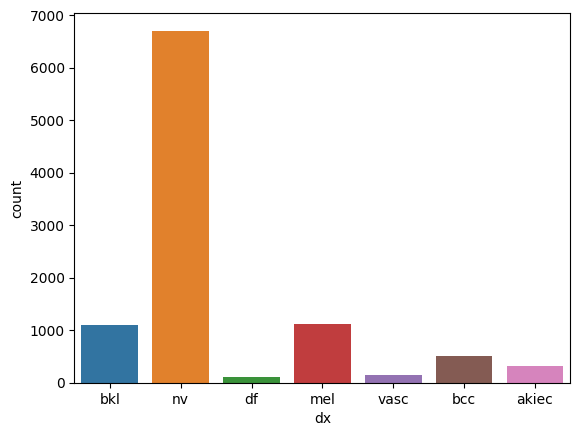

In [29]:
res = seaborn.countplot(x=df['dx'])
plt.show()

In [30]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

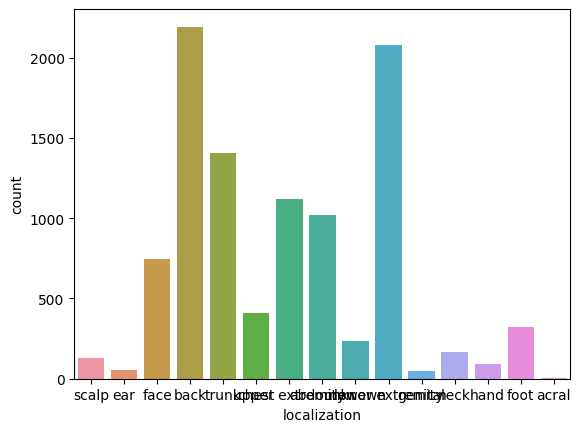

In [20]:
res = seaborn.countplot(x=df['localization'])
plt.show()

In [15]:
df['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

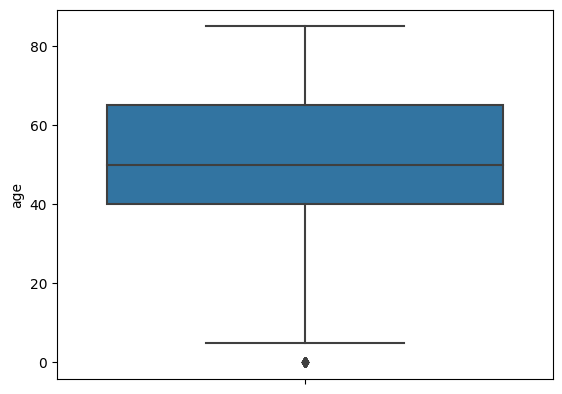

In [34]:
res = seaborn.boxplot(y=df['age'])
plt.show()

In [42]:
print("Min: ", df['age'].min())
print("Max: ", df['age'].max())

q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

iqa = q3 - q1 #interquartilsabstand
outliers = df[(df['age']< q1-1.5*iqa) | (df['age']> q3+1.5*iqa)]
print("Ausreißer: ", len(outliers))

Min:  0.0
Max:  85.0
Ausreißer:  39


In [58]:
missing_values_age = df['age'].isna()
count_age = 0

for value in missing_values_age:
    if value:
        count_age += 1


# Visualisierungen


In [65]:
sex_var = df['sex'].unique()
print(sex_var)
count_sex_unknown = 0

for value in df['sex']:
    if value == 'unknown':
        count_sex_unknown += 1


['male' 'female' 'unknown']
['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


In [66]:
localization_var = df['localization'].unique()
print(localization_var)
count_local_unknown = 0

for value in df['localization']:
  if value == 'unknown':
    count_local_unknown += 1

['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


In [67]:
print("Anzahl fehlender Werte in der 'age'-Spalte:", count_age)
print("Anzahl unbekannter Geschlechter:", count_sex_unknown)
print("Anzahl unbekannter Regionen: ", count_local_unknown)

Anzahl fehlender Werte in der 'age'-Spalte: 57
Anzahl unbekannter Geschlechter: 57
Anzahl unbekannter Regionen:  234


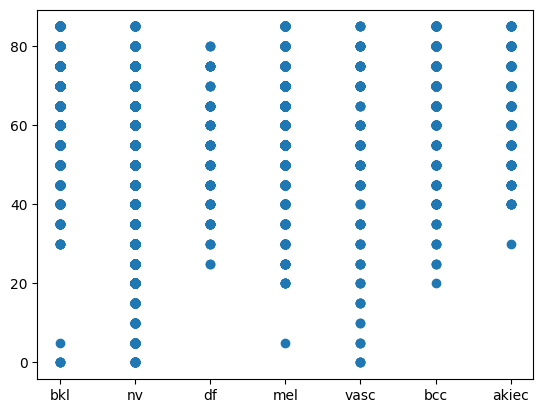

In [74]:
plt.scatter(df['dx'], df['age'])

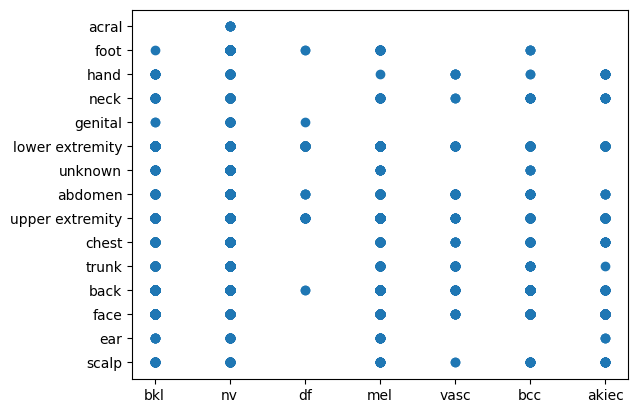

In [75]:
plt.scatter(df['dx'], df['localization'])

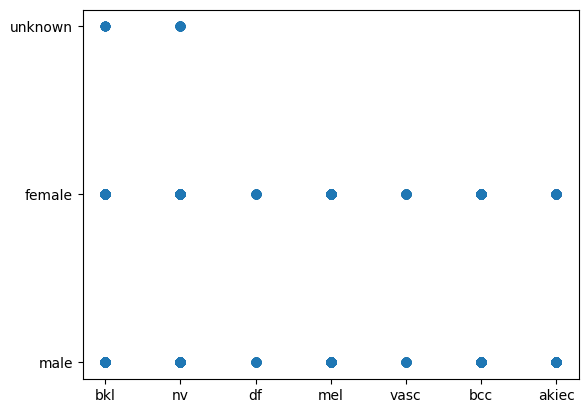

In [76]:
plt.scatter(df['dx'], df['sex'])

In [ ]:
one_hot_encoded_data = pd.get_dummies(df)
one_hot_encoded_data.corr(method='pearson')